In [1]:
'''The file that 
-Plots:
    1. target-output sine waves
    2. Loss function
    3. Spike Rasters
    4. Weight Changes
-Simulates Spike Jittering 
-Identifies Phase Tunes Neurons and Analyzes Weight Projections to and from these neurons'''

'The file that \n-Plots:\n    1. target-output sine waves\n    2. Loss function\n    3. Spike Rasters\n    4. Weight Changes\n-Simulates Spike Jittering \n-Identifies Phase Tunes Neurons and Analyzes Weight Projections to and from these neurons'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from snntorch import spikeplot as splt
import os

In [ ]:
'''Plots the output-target sine wave pairs for each 20th epoch'''
# Directory containing the NPZ files
data_dir = 'dataMP'

# Epochs of interest (0, 20, 40, ..., 400)
epochs = range(900,1000,10)
batch = 39

# Initialize lists to hold target and output data for each epoch
targets_list = []
outputs_list = []

# Initialize a list to hold spikes data
spikes_list = []

# Load spikes data from NPZ files
for epoch in epochs:
    file_name = f'level1_loss0_epoch{epoch}_batch39.npz'
    file_path = os.path.join(data_dir, file_name)
    
    if os.path.exists(file_path):
        data = np.load(file_path)
        targets = data['targets'][24]
        outputs = data['outputs'][24]
        
        # Assuming targets and outputs are of shape (25, ...)
        targets_list.append(targets)
        outputs_list.append(outputs)
    else:
        print(f"File {file_name} not found.")

# Plotting the target and output sine waves for each epoch
for i, epoch in enumerate(epochs):
    if i < len(targets_list):
        targets = targets_list[i]
        outputs = outputs_list[i]
        
        plt.figure(figsize=(10, 5))
        plt.plot(targets, linestyle='dotted',label=f'Target {i+1}')
        plt.scatter(range(len(outputs)), outputs, label=f'Output {i+1}', s=20)  # s=20 makes the dots smaller
        # plt.plot(outputs, linestyle='dotted')

        
        
        plt.title(f'Epoch {epoch} Batch')
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.legend()
        plt.show()
    else:
        print(f"No data for epoch {epoch}.")


In [15]:
'''Plots the loss between 0-500th epochs'''

# Directory containing the NPZ files
data_dir = 'dataMP'

# Initialize lists to hold the epoch numbers and batch loss values
epochs = range(0, 600, 50)  # Since epochs are recorded every 5 epochs
batchs = range(0,40)
batch_loss_lists_5trials1I = []
batch_loss_lists_5trials3I = []
# file_level = 401

batch_loss_values1 = []
# Load batch loss data from NPZ files
for epoch in epochs:
    batch_loss = 0
    for batch in batchs:
        file_name = f'level6_loss0_epoch{epoch}_batch{batch}.npz'  # Assuming batch 0 is representative
        file_path = os.path.join(data_dir, file_name)
        if os.path.exists(file_path):
            data = np.load(file_path)
            batch_loss += data['task_loss']
        else:
            print(f"File {file_name} not found.")
            batch_loss_values.append(None)
    batch_loss_values1.append(batch_loss/40)
# batch_loss_lists_5trials.append(batch_loss_values)

# for incr in range(4):
#     batch_loss_values = []
#     # Load batch loss data from NPZ files
#     for epoch in epochs:
#         batch_loss = 0
#         for batch in batchs:
#             file_name = f'level{file_level+incr}_loss0_epoch{epoch}_batch{batch}.npz'  # Assuming batch 0 is representative
#             file_path = os.path.join(data_dir, file_name)
#             if os.path.exists(file_path):
#                 data = np.load(file_path)
#                 batch_loss += data['task_loss']
#             else:
#                 print(f"File {file_name} not found.")
#                 batch_loss_values.append(None)
#         batch_loss_values.append(batch_loss/40)
#     batch_loss_lists_5trials.append(batch_loss_values)
        
# Then plot error bars for the average of 5 plots. 
# plot error bars for the average of 5 plots. 
#plots mean and standard deviation around the mean, shaded. 
# task_mean = np.mean(batch_loss_lists_5trials,0)
# task_error = np.std(batch_loss_lists_5trials,0)
# plt.plot(np.arange(0,100),task_mean, label='task loss', color='darkorange')
# plt.fill_between(np.arange(0,100),task_mean-task_error, task_mean+task_error, alpha=0.4, facecolor='darkorange')
# plt.show()

# # Remove None values and corresponding epochs if any file was not found
# batch_loss_values = [loss for loss in batch_loss_values if loss is not None]

# # Plotting the batch loss over epochs
# plt.figure(figsize=(10, 5))
# plt.plot(epochs, batch_loss_values, marker='o')
# plt.title('Loss for 1I')
# plt.xlabel('Epoch')
# plt.ylabel('Batch Loss')
# plt.grid(True)
# plt.show()


In [16]:
batch_loss_lists_5trials1I = []
# file_level = 111

batch_loss_values2 = []
data_dir2 = 'share'
dir3= '3_v_1_interneurons_data'
dir4 = '3classes_Task8'

for epoch in epochs:
    batch_loss = 0
    for batch in batchs:
        # file_name = f'3classes_data_epoch{epoch}.npz'  # Assuming batch 0 is representative
        # file_path = os.path.join(data_dir2,dir3,dir4, file_name)
        file_name = f'level630_loss0_epoch{epoch}_batch{batch}.npz'  # Assuming batch 0 is representative
        file_path = os.path.join(data_dir, file_name)
        
        if os.path.exists(file_path):
            data = np.load(file_path)
            batch_loss += data['task_loss']
        else:
            print(f"File {file_name} not found.")
            batch_loss_values.append(None)
    batch_loss_values2.append(batch_loss/40)
    

# for incr in range(4):
    # batch_loss_values = []
    # # Load batch loss data from NPZ files
    # for epoch in epochs:
    #     batch_loss = 0
    #     for batch in batchs:
    #         file_name = f'level{file_level+incr}_loss0_epoch{epoch}_batch{batch}.npz'  # Assuming batch 0 is representative
    #         file_path = os.path.join(data_dir, file_name)
    #         if os.path.exists(file_path):
    #             data = np.load(file_path)
    #             batch_loss += data['task_loss']
    #         else:
    #             print(f"File {file_name} not found.")
    #             batch_loss_values.append(None)
    #     batch_loss_values.append(batch_loss/40)
    # batch_loss_lists_5trials1I.append(batch_loss_values)


# task_mean1 = np.mean(batch_loss_lists_5trials1I,0)
# task_error1 = np.std(batch_loss_lists_5trials1I,0)
# task_mean3 = np.mean(batch_loss_lists_5trials,0)
# task_error3 = np.std(batch_loss_lists_5trials,0)

In [6]:
print(len(batch_loss_values1))
print(len(batch_loss_values2))

50
50


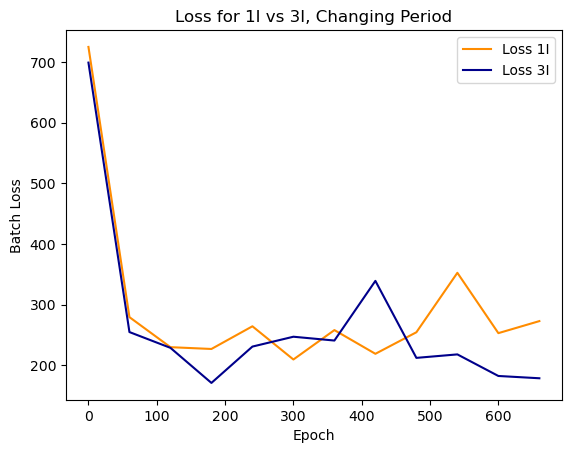

In [20]:
plt.plot(np.arange(0,12)*60,batch_loss_values1, label='task loss1I', color='darkorange')
plt.plot(np.arange(0,12)*60,batch_loss_values2, label='task loss3I', color='darkblue')
# plt.fill_between(np.arange(0,100)*10,task_mean1-task_error1, task_mean1+task_error1, alpha=0.4, facecolor='darkorange')
# plt.fill_between(np.arange(0,100)*10,task_mean3-task_error3, task_mean3+task_error3, alpha=0.2, facecolor='blue')

plt.title('Loss for 1I vs 3I, Changing Period')
plt.xlabel('Epoch')
plt.ylabel('Batch Loss')
plt.legend(['Loss 1I', 'Loss 3I'])
plt.show()

In [55]:
import scipy.stats as ks_2s
# calculate final loss value belonging to epoch999 for all 5 trials and take the mean 
# for both 3I and one I. Then calculate statistical significance. 
batch_loss_arr = []
# data_dir = "dataMP"

filelist = [1,111,112,113,114,13,131,132,133,134]

for i in filelist:
    batch_loss=0
    for batch in range(0,39):
        file_1 = f'level{i}_loss0_epoch990_batch{batch}.npz' 
        file_path = os.path.join(data_dir, file_1)
        data1 = np.load(file_path)
        batch_loss += data1['task_loss']
    batch_loss_arr.append(batch_loss/40)
    
data1 = batch_loss_arr[:5]
data2 = batch_loss_arr[5:]
[D, p] = ks_2s.ks_2samp(data1,data2)

print(data1)
print(data2)
print(D)
print(p)
    
    

[532.0214729309082, 733.3903442382813, 566.584578704834, 538.9149147033692, 469.3181541442871]
[452.28893280029297, 379.6444831848145, 369.83239822387696, 404.8277931213379, 426.3593215942383]
1.0
0.007936507936507936


(20, 40)


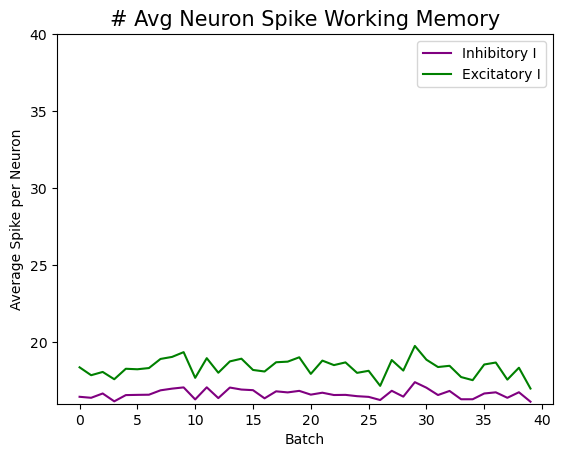

In [32]:
data_dir = "dataMP"
# Define the range for epochs and batches
epochs = range(0, 1000, 10)
batch = range(0, 40)
training_index = 2

# Initialize arrays to hold spike sums
inh_spike_ar = []
exc_spike_ar = []
inh_ar=[]
exc_ar=[]

# Initialize a list to hold spikes data
spikes_list = []

filelist = [1,111,112,113,114,13,131,132,133,134,400,401,402,403,404,4003,40031,40032,40033,40034]

for i in filelist:
    for b in batch:
        file_name = f'level{i}_loss0_epoch990_batch{b}.npz'
        file_path = os.path.join(data_dir, file_name)

        if os.path.exists(file_path):
            data = np.load(file_path)
            spikes = data['spikes']
            spikes_list.append(spikes)

            # Sum inhibitory (last 40 neurons) and excitatory (first 160 neurons) spikes
            inh_ar.append(np.sum(spikes[160:200,:]))
            exc_ar.append(np.sum(spikes[:160,:]))

        else:
            print(f"File {file_name} not found.")
    
    inh_spike_ar.append(np.array(inh_ar)/40)
    exc_spike_ar.append(np.array(exc_ar)/160)
    
    inh_ar = []
    exc_ar = []
inh_spike_ar = np.array(inh_spike_ar)   
exc_spike_ar = np.array(exc_spike_ar)

print(inh_spike_ar.shape)
itask_meanc = np.mean(inh_spike_ar[:5,:],0)
itask_errorc = np.std(inh_spike_ar[:5,:],0)
itask_meanc3 = np.mean(inh_spike_ar[5:10,:],0)
itask_errorc3 = np.std(inh_spike_ar[5:10,:],0)
itask_meanw = np.mean(inh_spike_ar[10:15,:],0)
itask_errorw = np.std(inh_spike_ar[10:15,:],0)
itask_meanw3 = np.mean(inh_spike_ar[15:,:],0)
itask_errorw3 = np.std(inh_spike_ar[15:,:],0)


etask_meanc = np.mean(exc_spike_ar[:5,:],0)
etask_errorc = np.std(exc_spike_ar[:5,:],0)
etask_meanc3 = np.mean(exc_spike_ar[5:10,:],0)
etask_errorc3 = np.std(exc_spike_ar[5:10,:],0)
etask_meanw = np.mean(exc_spike_ar[10:15,:],0)
etask_errorw = np.std(exc_spike_ar[10:15,:],0)
etask_meanw3 = np.mean(exc_spike_ar[15:,:],0)
etask_errorw3 = np.std(exc_spike_ar[15:,:],0)

# plt.plot(np.arange(0,40),itask_meanc, label='inhibitory spikes control', color='purple')
plt.plot(np.arange(0,40),itask_meanw, label='inhibitory spikes working', color='purple')
# plt.plot(np.arange(0,40),etask_meanc, label='excitatory spikes control', color='green')
plt.plot(np.arange(0,40),etask_meanw, label='excitatory spikes working', color='green')
# plt.fill_between(np.arange(0,40),itask_meanc-itask_errorc, itask_meanc+itask_errorc, alpha=0.4, facecolor='darkorange')
# plt.fill_between(np.arange(0,40),itask_meanw-itask_errorw, itask_meanw+itask_errorw, alpha=0.2, facecolor='red')
# plt.fill_between(np.arange(0,40),etask_meanc-etask_errorc, etask_meanc+etask_errorc, alpha=0.4, facecolor='green')
# plt.fill_between(np.arange(0,40),etask_meanw-etask_errorw, etask_meanw+etask_errorw, alpha=0.2, facecolor='purple')

# plt.plot(np.arange(0,40),itask_meanc3, color='purple')
# plt.plot(np.arange(0,40),itask_meanw3, color='purple')
# plt.plot(np.arange(0,40),etask_meanc3, color='green')
# plt.plot(np.arange(0,40),etask_meanw3, color='green')
plt.ylim(16, 40)
# plt.fill_between(np.arange(0,40),itask_meanc3-itask_errorc3, itask_meanc3+itask_errorc3, alpha=0.4, facecolor='darkorange')
# plt.fill_between(np.arange(0,40),itask_meanw3-itask_errorw3, itask_meanw3+itask_errorw3, alpha=0.2, facecolor='red')
# plt.fill_between(np.arange(0,40),etask_meanc3-etask_errorc3, etask_meanc3+etask_errorc3, alpha=0.4, facecolor='green')
# plt.fill_between(np.arange(0,40),etask_meanw3-etask_errorw3, etask_meanw3+etask_errorw3, alpha=0.2, facecolor='purple')

# plt.title('Average Neuron Spike Across Batches Working Memory')
# plt.xlabel('Batch')
# plt.ylabel('Average Spike per Neuron')
# plt.legend(['Inhibitory 1I', 'Excitatory 1I'])
# plt.show()

plt.title('# Avg Neuron Spike Working Memory', fontsize=15)
plt.xlabel('Batch')
plt.ylabel('Average Spike per Neuron')
plt.legend(['Inhibitory I', 'Excitatory I'])
plt.tick_params(axis='both', which='major')  # Increase tick label size
plt.show()

In [9]:
print(np.mean(inh_spike_ar[10:15], axis=0))
print(np.mean(exc_spike_ar[10:15], axis=0))

[16.45     16.385    16.664999 16.155    16.560001 16.575    16.585001
 16.869999 16.98     17.06     16.28     17.064999 16.365    17.05
 16.92     16.880001 16.35     16.804998 16.735    16.835001 16.59
 16.715    16.564999 16.575    16.49     16.445002 16.240002 16.84
 16.460001 17.4      17.039999 16.564999 16.83     16.29     16.289999
 16.664999 16.74     16.385    16.744999 16.130001]
[18.36375  17.851252 18.06375  17.59     18.27     18.2375   18.31625
 18.907501 19.039999 19.348751 17.68125  18.9575   18.0125   18.748749
 18.92375  18.1925   18.0925   18.692501 18.7325   19.015    17.9375
 18.8      18.507498 18.68375  18.00375  18.1375   17.16     18.835001
 18.153751 19.75375  18.85875  18.3825   18.4625   17.73125  17.53
 18.5475   18.675001 17.564999 18.3375   16.985   ]


In [14]:
from scipy.stats import ks_2samp
inh_control = np.mean(inh_spike_ar[0:5,:], axis=1)
exc_control = np.mean(exc_spike_ar[0:5,:], axis=1)
print(inh_control)
print(exc_control)

# Perform the KS test on the differences
D1, p1 = ks_2samp(inh_control, exc_control)

# Output the results
print(f"KS Statistic: {D1}")
print(f"p-value: {p1}")

[36.7875  35.7375  33.335   39.9775  37.59875]
[31.63844  23.774687 28.364218 29.098125 30.745779]
KS Statistic: 1.0
p-value: 0.007936507936507936


In [19]:
from scipy.stats import ks_2samp
inh_control1 = np.mean(inh_spike_ar[15:20,:], axis=1)
exc_control1 = np.mean(exc_spike_ar[15:20,:], axis=1)
print(inh_control1)
print(exc_control1)

# Perform the KS test on the differences
D2, p2 = ks_2samp(inh_control1, exc_control1)

# Output the results
print(f"KS Statistic: {D2}")
print(f"p-value: {p2}")

[24.608126 21.784374 28.638123  0.       23.946875]
[29.188751 34.69984  19.862812  0.       18.913126]
KS Statistic: 0.4
p-value: 0.873015873015873


In [10]:
from scipy.stats import ks_2samp
# Assuming inh_spike_ar and exc_spike_ar are your spike arrays with shape (20, 40)
# 0-5 and 5-10 represent "control1" and "control3"
# 10-15 and 15-20 represent "working memory1" and "working memory3"

# Calculate the differences for control and working memory tasks
control_diff = np.mean(inh_spike_ar[0:5,:], axis=0) - np.mean(exc_spike_ar[0:5,:], axis=0)
working_memory_diff = np.mean(inh_spike_ar[10:15,:], axis=0) - np.mean(exc_spike_ar[10:15,:], axis=0)

# Perform the KS test on the differences
D, p = ks_2samp(control_diff, working_memory_diff)

# Output the results
print(f"KS Statistic: {D}")
print(f"p-value: {p}")


KS Statistic: 1.0
p-value: 1.860340365603627e-23


In [12]:
# Calculate the differences for control and working memory tasks
control_diff1 = np.mean(inh_spike_ar[5:10,:], axis=0) - np.mean(exc_spike_ar[5:10,:], axis=0)
working_memory_diff1 = np.mean(inh_spike_ar[15:20,:], axis=0) - np.mean(exc_spike_ar[15:20,:], axis=0)

# Perform the KS test on the differences
D1, p1 = ks_2samp(control_diff1, working_memory_diff1)

# Output the results
print(f"KS Statistic: {D1}")
print(f"p-value: {p1}")

KS Statistic: 1.0
p-value: 1.860340365603627e-23


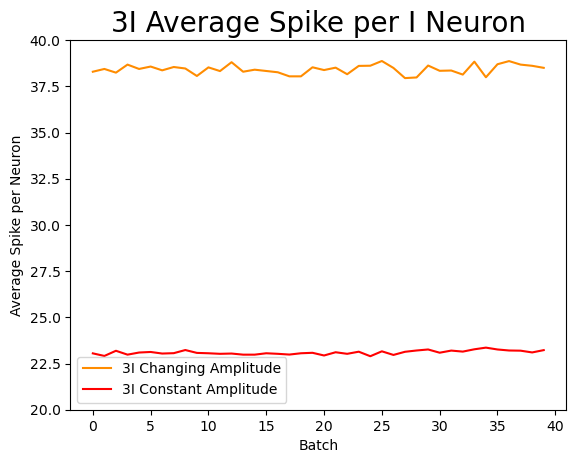

In [16]:
data_dir = "dataMP"
# Define the range for epochs and batches
epochs = range(0, 1000, 10)
batch = range(0, 40)
training_index = 2

# Initialize arrays to hold spike sums
inh_spike_ar2 = []
exc_spike_ar2 = []
inh_ar2=[]
exc_ar2=[]

# Initialize a list to hold spikes data
spikes_list = []

filel = [0,91,92,93,94,303,3031,3032,3033,3034,6,61,62,63,64,630,631,632,633,634]

for k in filel:
    for b in batch:
        file_name = f'level{k}_loss0_epoch990_batch{b}.npz'
        file_path = os.path.join(data_dir, file_name)

        if os.path.exists(file_path):
            data = np.load(file_path)
            spikes = data['spikes']
            spikes_list.append(spikes)

            # Sum inhibitory (last 40 neurons) and excitatory (first 160 neurons) spikes
            inh_ar2.append(np.sum(spikes[160:200,:]))
            exc_ar2.append(np.sum(spikes[:160,:]))

        else:
            print(f"File {file_name} not found.")
    
    inh_spike_ar2.append(np.array(inh_ar2)/40)
    exc_spike_ar2.append(np.array(exc_ar2)/160)
    
    inh_ar2 = []
    exc_ar2 = []
inh_spike_ar2 = np.array(inh_spike_ar2)   
exc_spike_ar2 = np.array(exc_spike_ar2)

itask_meanconstantperiod = np.mean(inh_spike_ar2[:5,:],0)
# itask_errorconstantperiod = np.std(inh_spike_ar2[:5,:],0)
itask_meanconstantperiod3 = np.mean(inh_spike_ar2[5:10,:],0)
# itask_errorconstantperiod3 = np.std(inh_spike_ar2[5:10,:],0)
itask_meanconstantamplitude = np.mean(inh_spike_ar2[10:15,:],0)
# itask_errorconstantamplitude = np.std(inh_spike_ar2[10:15,:],0)
itask_meanconstantamplitude3 = np.mean(inh_spike_ar2[15:,:],0)
# itask_errorconstantamplitude3 = np.std(inh_spike_ar2[15:,:],0)


etask_meanconstantperiod = np.mean(exc_spike_ar2[:5,:],0)
# etask_errorconstantperiod = np.std(exc_spike_ar2[:5,:],0)
etask_meanconstantperiod3 = np.mean(exc_spike_ar2[5:10,:],0)
# etask_errorconstantperiod3 = np.std(exc_spike_ar2[5:10,:],0)
etask_meanconstantamplitude = np.mean(exc_spike_ar2[10:15,:],0)
# etask_errorconstantamplitude = np.std(exc_spike_ar2[10:15,:],0)
etask_meanconstantamplitude3 = np.mean(exc_spike_ar2[15:,:],0)
# etask_errorconstantamplitude3 = np.std(exc_spike_ar2[15:,:],0)

# plt.plot(np.arange(0,40),itask_meanconstantperiod, color='darkorange')
# plt.plot(np.arange(0,40),itask_meanconstantamplitude, color='red')
# plt.plot(np.arange(0,40),etask_meanconstantperiod, color='orange')
# plt.plot(np.arange(0,40),etask_meanconstantamplitude, color='red')
# plt.fill_between(np.arange(0,40),itask_meanconstantperiod-itask_errorconstantperiod, itask_meanconstantperiod+itask_errorconstantperiod, alpha=0.4, facecolor='darkorange')
# plt.fill_between(np.arange(0,40),itask_meanconstantamplitude-itask_errorconstantamplitude, itask_meanconstantamplitude+itask_errorconstantamplitude, alpha=0.2, facecolor='red')
# plt.fill_between(np.arange(0,40),etask_meanconstantperiod-etask_errorconstantamplitude, etask_meanconstantperiod+etask_errorconstantamplitude, alpha=0.4, facecolor='green')
# plt.fill_between(np.arange(0,40),etask_meanconstantamplitude-etask_errorconstantamplitude, etask_meanconstantamplitude+etask_errorconstantamplitude, alpha=0.2, facecolor='blue')

plt.plot(np.arange(0,40),itask_meanconstantperiod3, color='darkorange')
plt.plot(np.arange(0,40),itask_meanconstantamplitude3, color='red')
# plt.plot(np.arange(0,40),etask_meanconstantperiod3, color='orange')
# plt.plot(np.arange(0,40),etask_meanconstantamplitude3, color='red')
# plt.fill_between(np.arange(0,40),itask_meanconstantperiod3-itask_errorconstantperiod3, itask_meanconstantperiod3+itask_errorconstantperiod3, alpha=0.4, facecolor='darkorange')
# plt.fill_between(np.arange(0,40),itask_meanconstantamplitude3-itask_errorconstantamplitude3, itask_meanconstantamplitude3+itask_errorconstantamplitude3, alpha=0.2, facecolor='red')
# # plt.fill_between(np.arange(0,40),etask_meanconstantperiod3-etask_errorconstantamplitude3, etask_meanconstantperiod3+etask_errorconstantamplitude3, alpha=0.4, facecolor='green')
# # plt.fill_between(np.arange(0,40),etask_meanconstantamplitude3-etask_errorconstantamplitude3, etask_meanconstantamplitude3+etask_errorconstantamplitude3, alpha=0.2, facecolor='blue')

plt.title('3I Average Spike per I Neuron', size=20)
plt.xlabel('Batch')
plt.ylabel('Average Spike per Neuron')
plt.legend(['3I Changing Amplitude', '3I Constant Amplitude'])
plt.ylim(20,40)
plt.show()

In [39]:
i_chang_amp= np.mean(inh_spike_ar2[5:10,:], axis=1)
i_const_amp= np.mean(inh_spike_ar2[15:20,:], axis=1)

print(i_chang_amp)
print(i_const_amp)

# Perform the KS test on the differences
D5, p5 = ks_2samp(i_chang_amp, i_const_amp)

# Output the results
print(f"KS Statistic: {D5}")
print(f"p-value: {p5}")

[37.75     36.00625  39.546875 40.979378 37.819374]
[22.145624 27.813126 15.865    18.414999 31.25    ]
KS Statistic: 1.0
p-value: 0.007936507936507936


In [42]:
e_chang_amp= np.mean(exc_spike_ar2[0:5,:], axis=1)
e_const_amp= np.mean(exc_spike_ar2[10:15,:], axis=1)

print(e_chang_amp)
print(e_const_amp)

# Perform the KS test on the differences
D6, p6 = ks_2samp(e_chang_amp, e_const_amp)

# Output the results
print(f"KS Statistic: {D6}")
print(f"p-value: {p6}")

[28.966877 33.447186 31.28031  29.510626 30.259064]
[22.583282 30.038593 31.11375  24.072344 33.07875 ]
KS Statistic: 0.4
p-value: 0.873015873015873


In [43]:
# Calculate the differences for control and working memory tasks
const_period_diff2 = np.mean(inh_spike_ar2[0:5], axis=1) - np.mean(exc_spike_ar2[0:5], axis=1)
const_amplitude_diff2 = np.mean(inh_spike_ar2[10:15], axis=1) - np.mean(exc_spike_ar2[10:15], axis=1)

# Perform the KS test on the differences
D2, p2 = ks_2samp(const_period_diff2, const_amplitude_diff2)

# Output the results
print(f"KS Statistic: {D2}")
print(f"p-value: {p2}")

KS Statistic: 0.6
p-value: 0.35714285714285715


In [44]:
# Calculate the differences for control and working memory tasks
const_period_diff3 = np.mean(inh_spike_ar2[5:10], axis=1) - np.mean(exc_spike_ar2[5:10], axis=1)
const_amplitude_diff3 = np.mean(inh_spike_ar2[15:20], axis=1) - np.mean(exc_spike_ar2[15:20], axis=1)

# Perform the KS test on the differences
D3, p3 = ks_2samp(const_period_diff3, const_amplitude_diff3)

# Output the results
print(f"KS Statistic: {D3}")
print(f"p-value: {p3}")

KS Statistic: 0.8
p-value: 0.07936507936507936


In [371]:
# calculate the total number of inhibitory spikes
file_name = f'level1_loss0_epoch480_batch39.npz'
file_path = os.path.join(data_dir, file_name)
    
data = np.load(file_path)
spikes = torch.from_numpy(data['spikes'])

print(spikes.shape)
print((spikes[160:,:]==1).sum())

In [5]:
# Calculate how many weights increased/decreased drastically
# Function to load weights from npz file
def load_weights(npz_file):
    data = np.load(npz_file)
    rec_weights = data['rec_weights']  # Shape: 200x200
    input_weights = data['input_weights']
    output_weights = data['output_weights']  # Shape: 1x200
    return rec_weights, input_weights, output_weights

# rec_weights, out_weights =load_weights('dataMP/level2_loss0_epoch480_batch39.npz')
# count_above_20 = np.sum(rec_weights > 20)
# count_below_40 = np.sum(rec_weights < -20)
    
# print("count_above_20",count_above_20, "count_below_20",count_below_40)


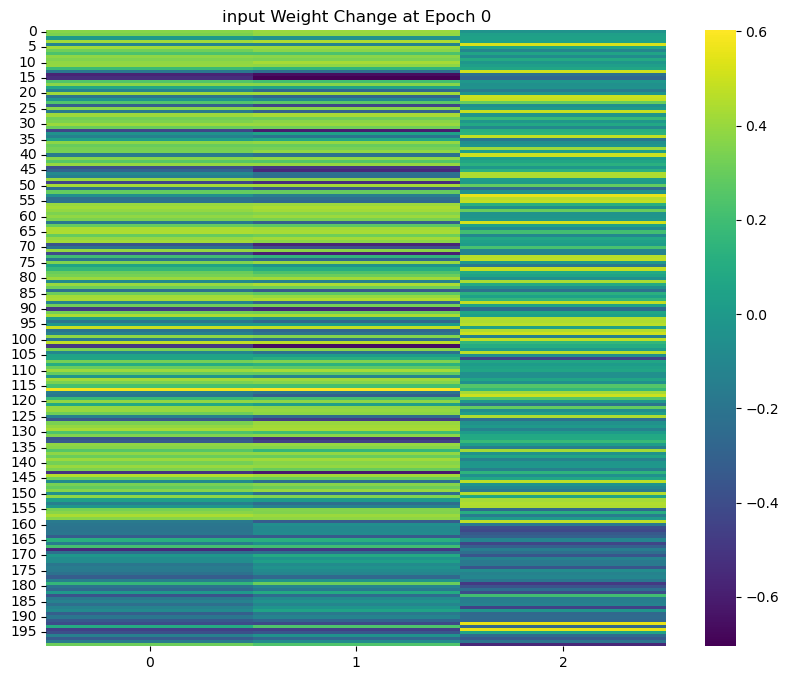

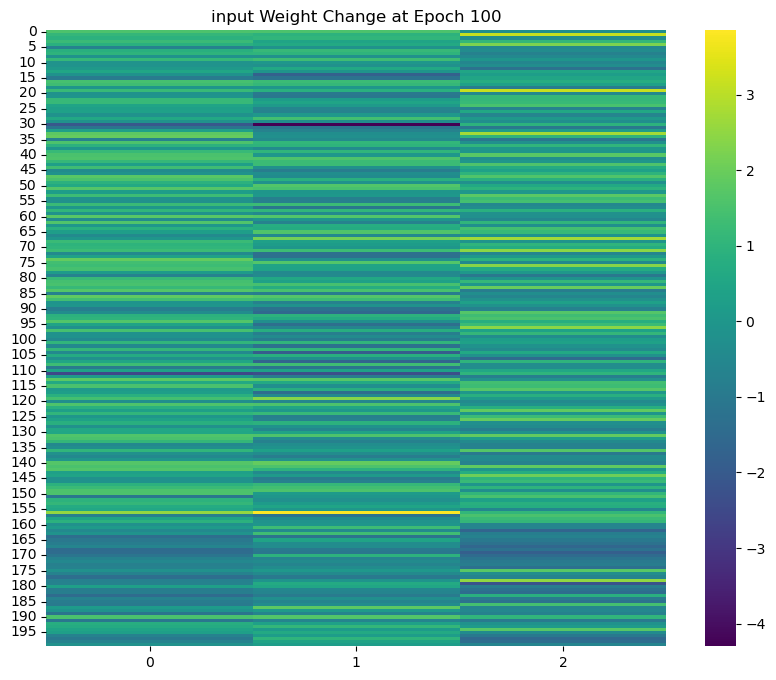

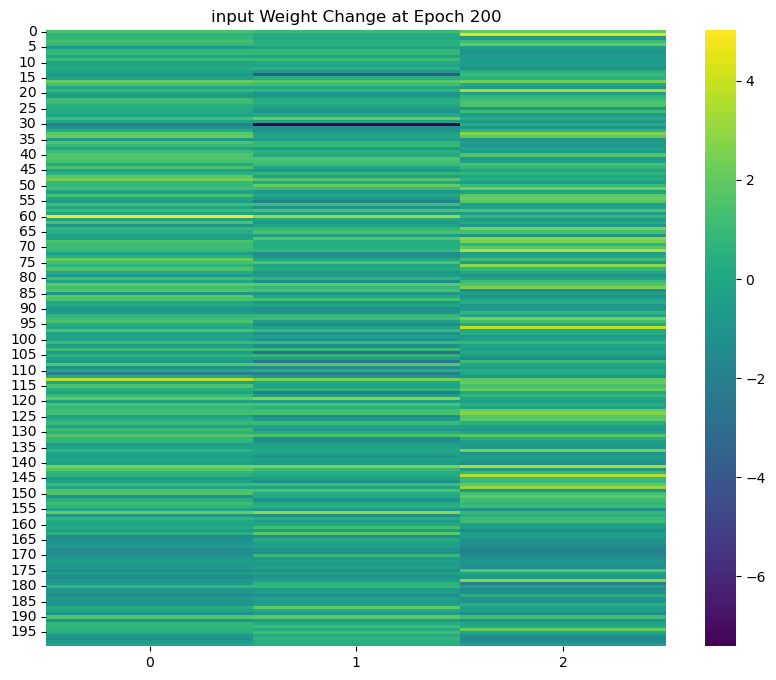

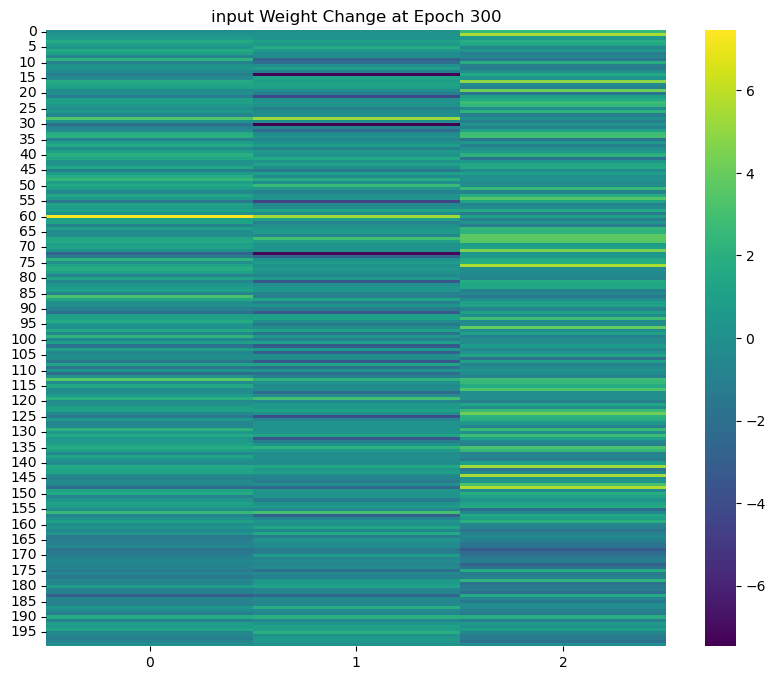

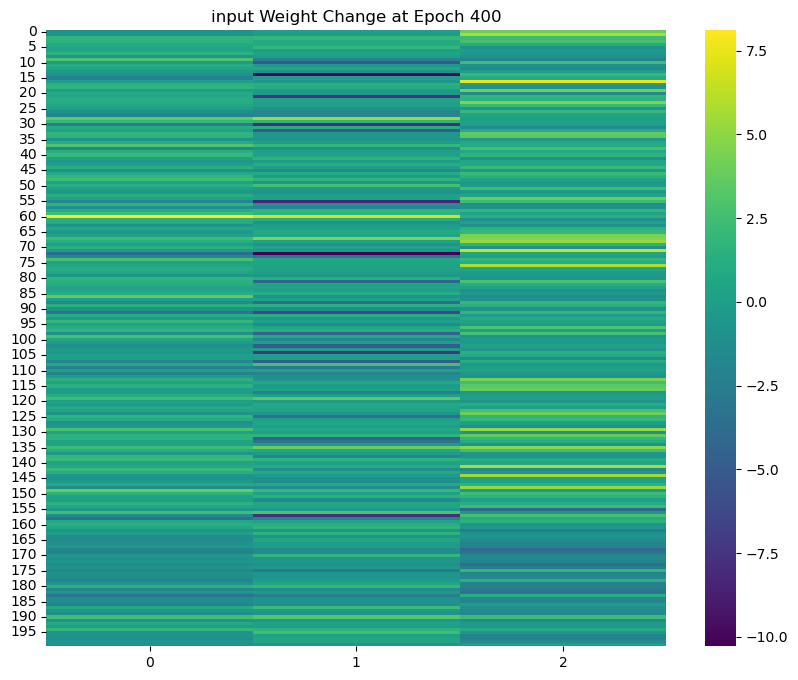

In [7]:
# Plot weight changes (for the recurrent and output layer) between epoch 0th epoch and each next 20th epoch.
# First plot (0-20), second (0-40) ... (0-480)

import matplotlib.pyplot as plt
import seaborn as sns

# Initialize lists to store weight differences
rec_weight_diffs = []
input_weight_diffs = []

# Define epochs to compare
epochs_to_compare = range(0, 500, 100)  # From epoch 0 to epoch 400 in steps of 20

# Function to plot heatmap
def plot_heatmap(data, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(data, cmap="viridis", annot=False)
    plt.title(title)
    plt.show()
    
epoch_file1 = f'dataMP/level40031_loss0_epoch0_batch0.npz'
rec_weight1, input_weight1, output_weight1 = load_weights(epoch_file1)
# Load and compare weights for each pair of epochs
for epoch in epochs_to_compare:
    epoch_file2 = f'dataMP/level40031_loss0_epoch{epoch}_batch39.npz'  # Assuming batch 19 has the last recorded batch
    # Load weights for epoch
    rec_weight2, input_weight2, output_weight2 = load_weights(epoch_file2)
    
    # Compute the change in weights
    Rec_weight_change = rec_weight2 - rec_weight1
    input_weight_change = input_weight2 - input_weight1
    output_weight_change = output_weight2 - output_weight1

    # Plot heatmaps
    # plot_heatmap(Rec_weight_change, f'Recurrent Weight Change at Epoch {epoch}')
    plot_heatmap(input_weight_change, f'input Weight Change at Epoch {epoch}')



In [374]:
file_name = f'level2_loss0_epoch{480}_batch{39}.npz'
file_path = os.path.join(data_dir, file_name)
    
if os.path.exists(file_path):
    data = np.load(file_path)
    spikes = data['spikes']
    rec_mx = torch.from_numpy(data['rec_weights']).T #200x200
    out_layer = data['output_weights']
    inputs = torch.from_numpy(data['inputs'][-1]).T
    

In [377]:
# helper function that counts num_spikes
def count_ones(tens):
    num_ones = 0
    for i in tens:
        if i == 1: num_ones += 1
    return num_ones

#print period value
print(inputs[1,0])

In [378]:
'''calculate all the neurons that are only active in one state of the sine wave, either positive or negative
(calculate number of phase tuned neurons)

ADJUST DEPENDING ON YOUR PERIOD. 
Each 0th index of a new tuple should be the 
incremented multiple of the period value. Below is an example for period=71'''

positive_ranges = [(0, 28),(71, 88), (142, 147),(213, 206),(284, 206),(236,265),(295,300)]
spikes = torch.from_numpy(spikes)
spikes = spikes.to(torch.int)
# Convert ranges to mask for positive_sine neurons
positive_mask = torch.zeros(300, dtype=torch.bool)
for start, end in positive_ranges:
    positive_mask[start:end+1] = True

# Invert the mask for negative_sine neurons
negative_mask = ~positive_mask

# Lists to store indices of positive_sine and negative_sine neurons
positive_sine_indices = []
negative_sine_indices = []
zero_tensor = torch.zeros(spikes.shape[1])

# Iterate through each neuron
for i in range(spikes.shape[0]):
    neuron_firings = spikes[i, :]

    # Classify the neuron
    if torch.all(neuron_firings == zero_tensor) | count_ones(neuron_firings) < 3:
        pass
    elif torch.all(neuron_firings & positive_mask == neuron_firings)&torch.all(neuron_firings & negative_mask == zero_tensor):
        positive_sine_indices.append(i)
    elif torch.all(neuron_firings & negative_mask == neuron_firings)&torch.all(neuron_firings & positive_mask == zero_tensor):
        negative_sine_indices.append(i)

# Output the results
print("Positive sine neuron indices:", positive_sine_indices)
print("Negative sine neuron indices:", negative_sine_indices)



Positive sine neuron indices: []
Negative sine neuron indices: []


In [365]:
'''Experiment with projections from a single neuron.
Identify state tuned neurons using the code above, replace 179 with the index number
Check for strong weights that the neuron projects.
'''
print(rec_mx[179,:])

# Find the indices where the weight entries are less than -30 (for inhibitory) or more than 30
indices = torch.nonzero(rec_mx[179, :] > 30).squeeze()
indices1 = torch.nonzero(rec_mx[179, :] < -30).squeeze()


# Print the indices
print(indices)
print(indices1)

tensor([  0.0000,   0.0000,   0.0000, -13.5598,   0.0000,  -0.3164,   0.0000,
         -4.3290,   0.0000,   0.0000,  -3.7798,   0.0000,  -6.1385,   0.0000,
          0.0000,   0.0000,  -4.3505,   0.0000,   0.0000,   0.0000,  -4.0334,
         -7.0525,   0.0000,  -4.1352,  -3.6191,   0.0000,   0.0000,   0.0000,
         -0.3813,   0.0000,   0.0000,   0.0000,   0.0000,  -4.2083,   0.0000,
          0.0000,   0.0000,  -1.7714,   0.0000,   0.0000,   0.0000, -10.1608,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,  -4.8787, -11.5507,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
         -6.4931,  -2.0029,  -5.5309,   0.0000,   0.0000,   0.0000,  -3.8702,
         -4.8828,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,  -4.0509,   0.0000,  -1.8669,   0.0000,  -6.5594,
         -6.5518,   0.0000,   0.0000,   0.0000,  -4.0513,   0.00

In [ ]:
# plot a spike raster and try to observe the phase tuned neurons!

plt.figure(figsize=(10, 5))
for neuron, spike_train in enumerate(spikes[:,:]):
    spike_times = np.where(spike_train > 0)[0]  # Assuming spikes are indicated by positive values
    plt.vlines(spike_times, neuron + 0.5, neuron + 1.5)

plt.title(f'Raster Plot of Spikes\nEpoch {460} Batch {batch} Training Index 24')
plt.xlabel('Time')
plt.ylabel('Neuron Index')
plt.show()

In [154]:
'''Jitter all 300ms worth of spikes with a number between (-4, 4) '''

import random
pos_neg_indices = sorted(positive_sine_indices + negative_sine_indices)

def generate_nonzero_random():
    while True:
        num = int(random.uniform(-4, 4))  # Generate a random float between -4 and 4
        if num != 0:
            return num
        
spikes1 = torch.zeros([200,300])
for neur in range(spikes1.shape[0]):
    for timestep in range(spikes.shape[1]):
        if spikes[neur,timestep] == 1:
            jitter = generate_nonzero_random()
            if (timestep+jitter >= 0) & (timestep+jitter < 300):
                spikes1[neur,timestep+jitter] = 1
            

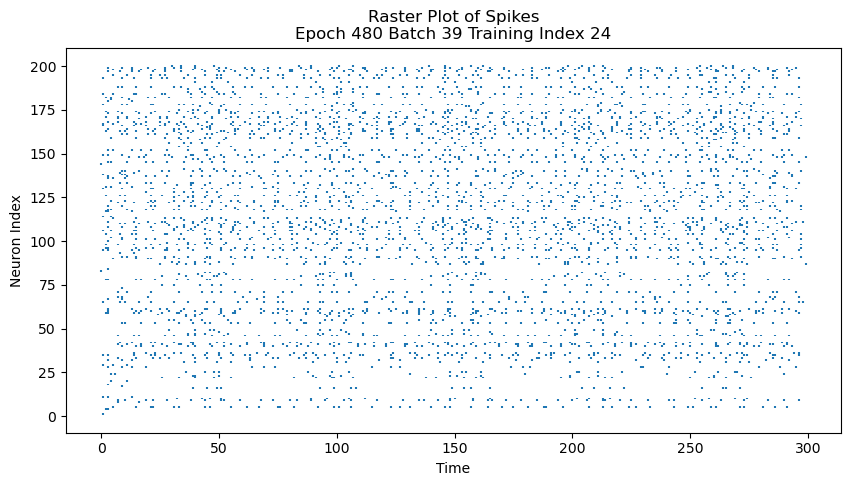

In [155]:
# Scatter plot of jittered spikes
plt.figure(figsize=(10, 5))
for neuron, spike_train in enumerate(spikes1):
    spike_times = np.where(spike_train > 0)[0]  # Assuming spikes are indicated by positive values
    plt.vlines(spike_times, neuron + 0.5, neuron + 1.5)

plt.title(f'Raster Plot of Spikes\nEpoch {480} Batch {batch} Training Index 24')
plt.xlabel('Time')
plt.ylabel('Neuron Index')
plt.show()

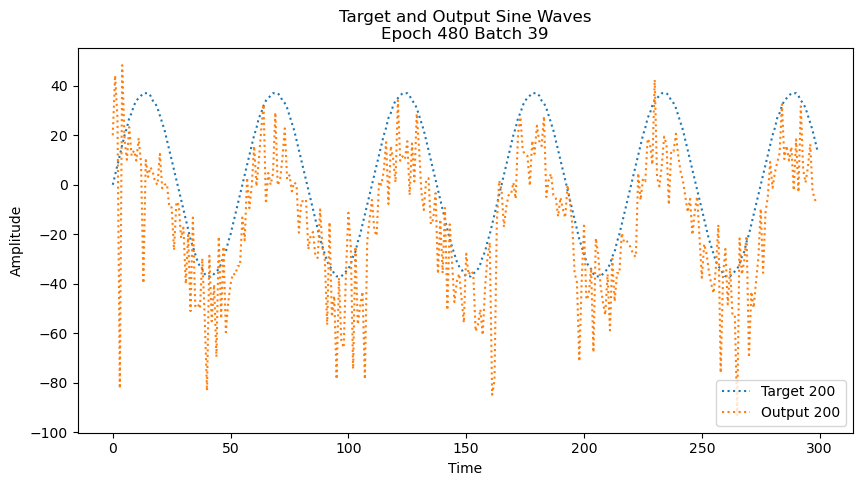

In [156]:
# Plot the output-target pairs with jittered spike to check for robustness
out_layer = torch.from_numpy(out_layer)
out_layer = out_layer.to(float)
spikes1 = spikes1.to(float)
output = torch.matmul(spikes1.T, out_layer.T)
targets = data['targets'][24]
      

# Plotting the target and output sine waves for each epoch
plt.figure(figsize=(10, 5))
plt.plot(targets, linestyle='dotted',label=f'Target {i+1}')
plt.plot(output, linestyle='dotted', label=f'Output {i+1}')

plt.title(f'Target and Output Sine Waves\nEpoch 480 Batch {batch}')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [158]:
# Instantiate apt variables for the experiment of jittering first 10 ms of spikes

data_dir = 'dataMP'
file_name = 'level51_loss0_epoch480_batch39.npz'
file_path = os.path.join(data_dir, file_name)

if os.path.exists(file_path):
        data = np.load(file_path)
        #shape 200x200 and 1x200,epoch 480, batch 39, training data 24
        l1_mx = torch.from_numpy(data['input_weights']).T  #2x200
        rec_mx = torch.from_numpy(data['rec_weights']).T #200x200
        l2_mx = torch.from_numpy(data['output_weights']).T #200x1
        inputs = torch.from_numpy(data['inputs'][-1]).T
        spikes = torch.from_numpy(data['spikes'])
        targets = data['targets'][-1]
        outputs = data['outputs'][-1]



In [159]:
#Jitter first 10 ms of spikes

spikes1 = torch.zeros([200,300])
# print(spikes[:20,:10])
for neur in range(200):
    for timestep in range(10):
        if spikes[neur,timestep] == 1:
            jitter = generate_nonzero_random()
            # print(jitter)
            if (timestep+jitter >= 0) & (timestep+jitter < 10):
                # spikes1[neur,timestep] = 0
                spikes1[neur,timestep+jitter] = 1

In [160]:
# Instantiate a new RSNN with the already trained model variables 

from classes.helper1 import conn_mx, hid_mx
from classes.RLIF1 import RLIF1
import torch.nn as nn


#set the rec_mx and output layer matrix to already trained model (trained on sinewave0 dataloader train_data_hpc0)
#set the input layer 3x200: first row to first row, and third row to second row of the trained model
class RSNN400(nn.Module):
    def __init__(self):
        super(RSNN400, self).__init__()
        num_inputs = 3
        num_hidden = 200
        num_output = 1
        beta = 0.85
        pe_e = 0.16

        # Define the dimensions
        num_excitatory = 160
        self.num_excitatory = num_excitatory
        num_inhibitory = 40
        self.false_neg = []
        self.false_pos = []

        #input to hidden layer
        # input_hid_mx = conn_mx(num_inputs, num_hidden, pe_e)
        # input_hid_mx= l1_mx 
        # self.input_hid_mx = input_hid_mx
        self.l1 = nn.Linear(num_inputs,num_hidden)
        self.l1.weight.data = l1_mx.T

        # Recurrent layer weight matrix        
        self.rlif1 = RLIF1(reset_mechanism="zero", beta=beta, threshold=1.0,linear_features=num_hidden, all_to_all=True)
        self.rlif1.recurrent.weight.data = rec_mx.T

        #hidden to output layer
        # hid_out_mx = conn_mx(num_hidden,num_output,pe_e)
        self.l2 = nn.Linear(num_hidden, num_output)
        self.l2.weight.data = l2_mx.T
        
        self.spk1_rec = []
        self.cur2_rec = []
        self.spk1,self.mem1 = self.rlif1.init_rleaky()


    def forward(self, inputs, spk1, mem1):
        cur1 = self.l1(inputs)
        spk1, mem1 = self.rlif1(cur1, spk1, mem1)
        cur2 = self.l2(spk1)
        
        self.mem1 = mem1

        return cur2, spk1, mem1

In [161]:
# Initialize spikes and membrane potentials
net_400 = RSNN400()
spk1 = net_400.spk1
mem1 = net_400.mem1
spk_list = []
mem_list = []
spikes1 = spikes1.to(torch.float32)

torch.float32


In [162]:
#jitter the spikes for the first 10 ms, and run the network on jittered initial spikes. 
for i in range(300):
    # print(inputs.dtype)
    if i < 10:
        spk1 = spikes1[:, i]
        net_400.spk1_rec.append(spk1)
        mem1 = net_400.mem1  # Update membrane potential if needed
        cur2, spk1, mem1 = net_400.forward(inputs[:, i], spk1, mem1)
        net_400.cur2_rec.append(cur2)
    else:
        # For the remaining timesteps, run the network normally
        cur2, spk1, mem1 = net_400.forward(inputs[:, i], spk1, mem1)
        net_400.spk1_rec.append(spk1)
        net_400.cur2_rec.append(cur2)

# Convert recorded spikes and currents to tensors
spk1_rec = torch.stack(net_400.spk1_rec).T
cur2_rec = torch.stack(net_400.cur2_rec)

torch.Size([200, 300])


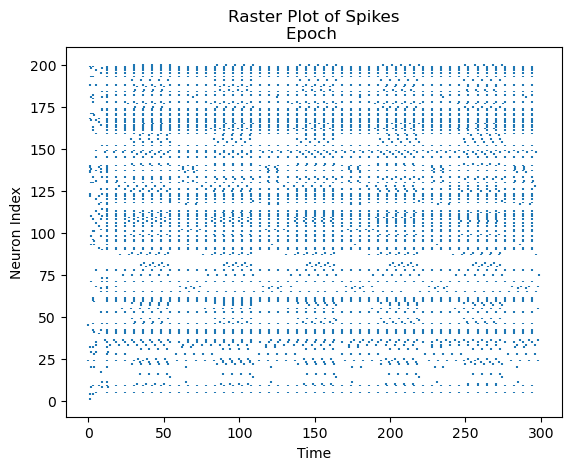

In [163]:
# Plot the spike raster with 10 ms jittered spikes
print(spk1_rec.shape)

for neuron, spike_train in enumerate(spk1_rec):
    spike_times = np.where(spike_train > 0)[0]  # Assuming spikes are indicated by positive values
    plt.vlines(spike_times, neuron + 0.5, neuron + 1.5)

plt.title(f'Raster Plot of Spikes\nEpoch ')
plt.xlabel('Time')
plt.ylabel('Neuron Index')
plt.show()

In [164]:
l2_mx = l2_mx.to(float)
spk1_rec = spk1_rec.to(float)
output = torch.matmul(spk1_rec.T, l2_mx)
targets = data['targets'][24]

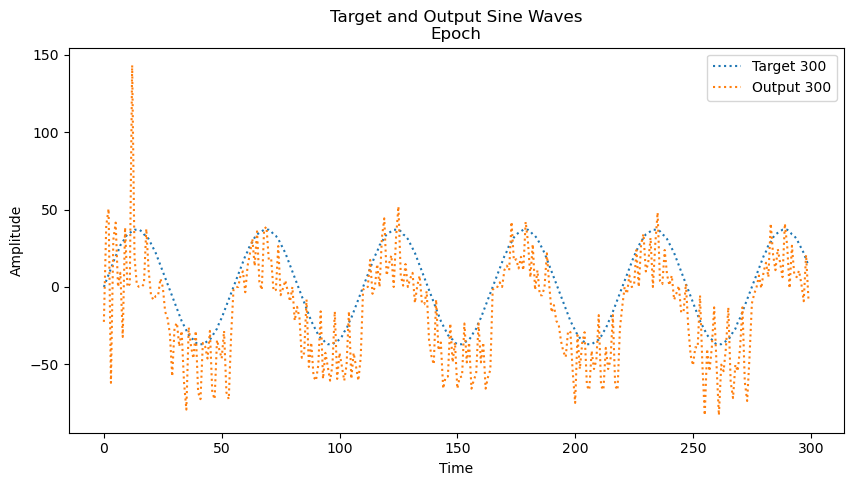

In [165]:
#plot the target-output pairs for the output of jittered spikes
output = output.squeeze().detach().numpy()

plt.figure(figsize=(10, 5))
plt.plot(targets, linestyle='dotted',label=f'Target {i+1}')
plt.plot(output, linestyle='dotted', label=f'Output {i+1}')

plt.title(f'Target and Output Sine Waves\nEpoch')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()